# Experimento: IRIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../')


from src.network import NeuralNetwork
from src.optimizers import Adam, SGD
from src.trainer import Trainer
from src.utils import (
    split_data, one_hot, fit_minmax, transform_minmax, accuracy,
    plot_curves, confusion_matrix, plot_confusion_matrix, show_predictions
)

from data.iris_loader import load_iris_csv, CLASS_NAMES as IRIS_CLASSES

In [11]:
X, y, class_names = load_iris_csv()
num_classes = len(class_names)

(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_data(
    X, y, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42, shuffle=True
)

Xmin, denom = fit_minmax(X_train)
X_train = transform_minmax(X_train, Xmin, denom)
X_val   = transform_minmax(X_val,   Xmin, denom)
X_test  = transform_minmax(X_test,  Xmin, denom)

y_train_oh = one_hot(y_train, num_classes)
y_val_oh   = one_hot(y_val,   num_classes)
y_test_oh  = one_hot(y_test,  num_classes)

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)
print('Clases:', class_names)

Train: (105, 4) Val: (22, 4) Test: (23, 4)
Clases: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


Epoch 001 | loss 0.9879 | acc 0.4948 | val_loss 0.9112889092563886 | val_acc 0.5454545454545454
Epoch 002 | loss 0.7452 | acc 0.6823 | val_loss 0.6751269605216272 | val_acc 0.8636363636363636
Epoch 003 | loss 0.5413 | acc 0.9097 | val_loss 0.5326639393198023 | val_acc 0.9545454545454546
Epoch 004 | loss 0.3945 | acc 0.9609 | val_loss 0.4620052690091432 | val_acc 0.7272727272727273
Epoch 005 | loss 0.3340 | acc 0.9062 | val_loss 0.391305119014632 | val_acc 0.9545454545454546
Epoch 006 | loss 0.3152 | acc 0.8863 | val_loss 0.31170273161864676 | val_acc 1.0
Epoch 007 | loss 0.2563 | acc 0.9097 | val_loss 0.257362679780827 | val_acc 1.0
Epoch 008 | loss 0.2258 | acc 0.9410 | val_loss 0.21234093723361 | val_acc 1.0
Epoch 009 | loss 0.1717 | acc 0.9609 | val_loss 0.17117896770253488 | val_acc 1.0
Epoch 010 | loss 0.1745 | acc 0.9410 | val_loss 0.1398344456975353 | val_acc 1.0
Epoch 011 | loss 0.1585 | acc 0.9410 | val_loss 0.14758679514179518 | val_acc 0.9545454545454546
Epoch 012 | loss 0.1

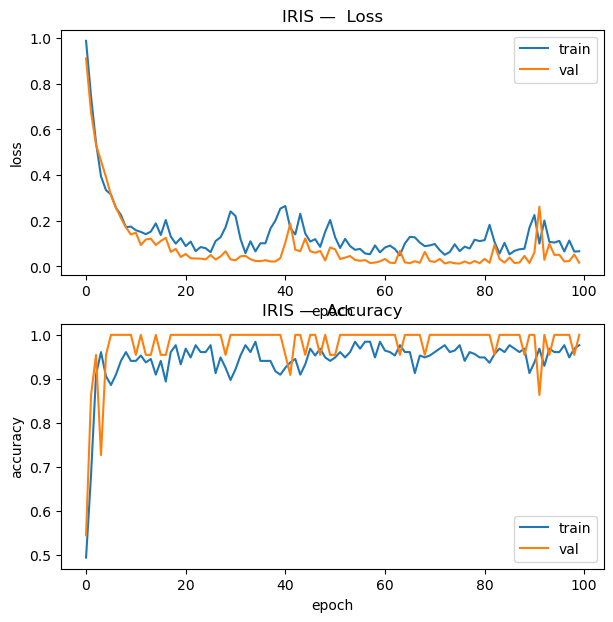

In [17]:
input_dim = X_train.shape[1]
architecture = [input_dim, 16, 16, num_classes]
activations = ['relu', 'relu', 'softmax']
dropout_rates = [0.0, 0.0, 0.0]
optimizer = SGD(lr=0.05, momentum=0.9, weight_decay=0.0)

net = NeuralNetwork(architecture, activations, dropout_rates=dropout_rates)
trainer = Trainer(net, optimizer, loss='cross_entropy')

history = trainer.train(
    X_train, y_train_oh,
    X_val=X_val, y_val=y_val_oh,
    epochs=100,
    batch_size=32,
    classification=True,
    verbose=True
)

plot_curves(history, title_prefix='IRIS — ')

Accuracy test: 1.0


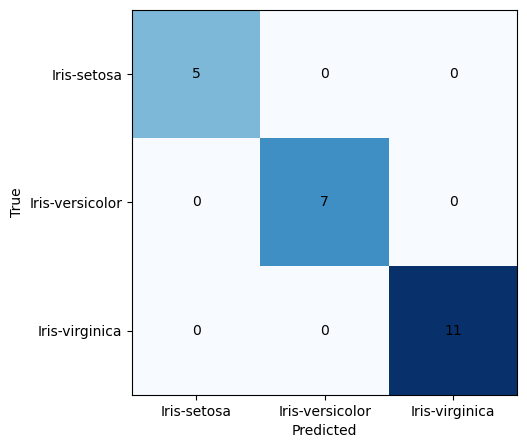

In [4]:
probs_test = net.forward(X_test)
test_acc = accuracy(y_test_oh, probs_test)
y_pred = np.argmax(probs_test, axis=1)
cm = confusion_matrix(y_test_oh, probs_test, num_classes)
print('Accuracy test:', float(test_acc))
plot_confusion_matrix(cm, class_names)